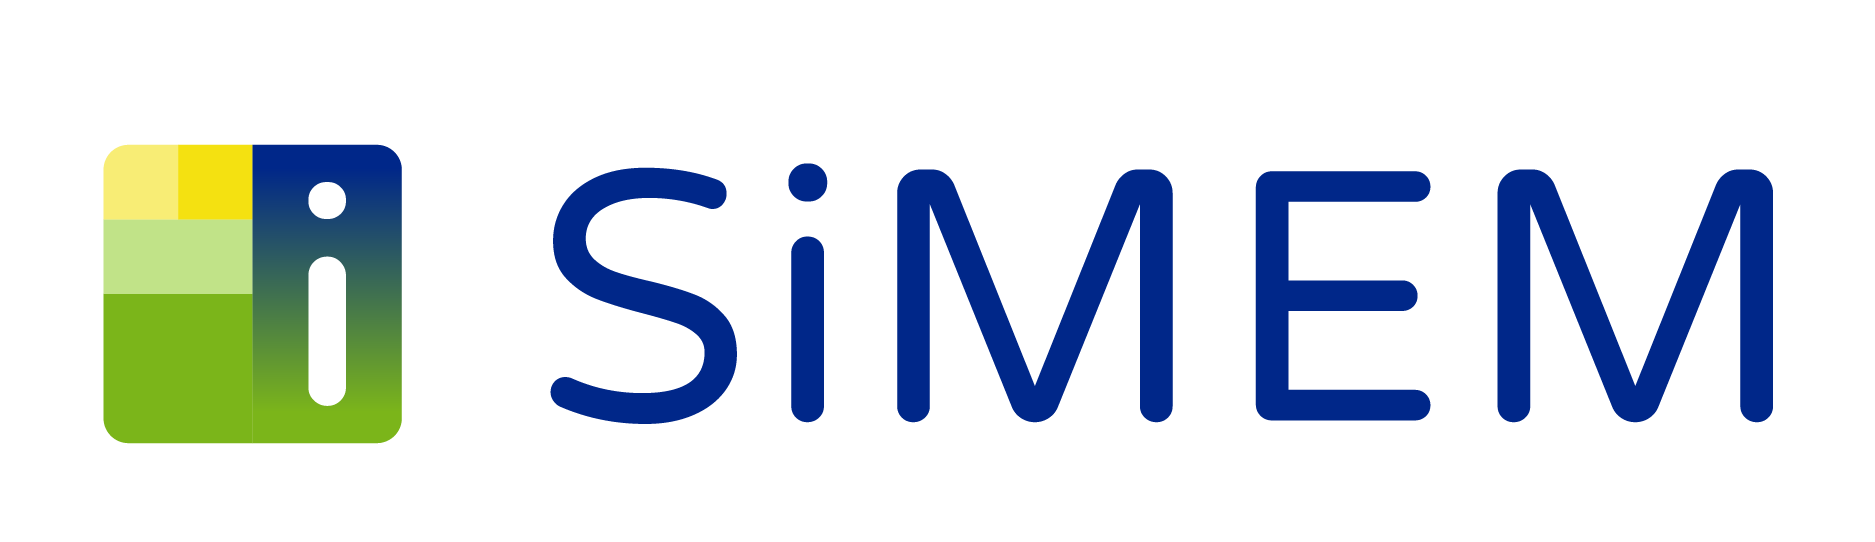

[SiMEM](https://www.simem.co/)

### Caso de uso - Comportamiento aportes hídricos y reservas en energía

* Presentar el paso a paso de cómo consultar la información de variables hidrologicas y su evolución en los ultimos meses.
* Demostrar cómo hacer filtros especializados en un conjunto de datos determinado para obtener las variables de interés.

### Importación de librerías


In [1]:
import sys
# !{sys.executable} -m pip install pydataxm
from pydataxm.pydatasimem import ReadSIMEM
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

### Consultar información de un conjunto de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Los conjuntos a presentar serán [Aportes Hídricos en Energía](https://www.simem.co/datadetail/BA1C5513-7DC3-4155-9DE9-D262863B31F3) y [Reservas hidrícas en energía](https://www.simem.co/datadetail/9605B04C-8D3A-40A9-94D3-5535670D2F9A) desde marzo 2024 hasta junio 2024.

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

In [2]:
id_dataset_aportes = 'BA1C55'
id_dataset_reservas = 'c51127'
fecha_inicial = '2024-03-15'
fecha_final = '2024-06-05'
simem = ReadSIMEM()

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [3]:
df_aportes = simem.main(id_dataset_aportes, fecha_inicial, fecha_final)
df_reservas = simem.main(id_dataset_reservas, fecha_inicial, fecha_final)
display(df_aportes.head())
display (df_reservas.head())

,FechaPublicacion,Fecha,CodigoSerieHidrologica,RegionHidrologica,AportesHidricosEnergia,PromedioAcumuladoEnergia,MediaHistoricaEnergia
0,2024-05-10,2024-04-14,DESVSMAR,Centro,74200.0,160000.0,360000.0
1,2024-05-10,2024-04-14,CUCUCUCU,Centro,288300.0,800000.0,950000.0
2,2024-05-10,2024-04-14,BETAMAG1,Centro,1114100.0,1800000.0,3140000.0
3,2024-05-10,2024-04-14,QUBRRGRD,Antioquia,20400.0,30000.0,90000.0
4,2024-05-10,2024-04-14,DESVMANS,Caldas,35400.0,10000.0,640000.0


,FechaPublicacion,Fecha,CodigoEmbalse,RegionHidrologica,VolumenUtilDiarioEnergia,CapacidadUtilEnergia,VolumenTotalEnergia,VolumenMaximoTecnicoEnergia,VertimientosEnergia,MinimoOperativoSuperior,MinimoOperativoInferior,CodigoDuracion
0,2024-05-11,2024-04-14,MIRAFLOR,Antioquia,3.828530e+07,4.559788e+08,5.597650e+07,4.736700e+08,0.0,25000000.0,25000000.0,P1D
1,2024-05-11,2024-04-14,PENOL,Antioquia,1.437897e+09,4.120467e+09,1.745653e+09,4.428223e+09,0.0,384985000.0,384985000.0,P1D
2,2024-05-11,2024-04-14,SISGA,CENTRO,1.911853e+08,4.109136e+08,1.911853e+08,4.109136e+08,,80153000.0,80153000.0,P1D
3,2024-05-11,2024-04-14,SALVAJIN,Valle,1.523380e+08,5.295982e+08,2.200019e+08,5.972621e+08,0.0,486295900.0,229194200.0,P1D
4,2024-05-11,2024-04-14,CALIMA1,Valle,8.542350e+07,2.190566e+08,1.392211e+08,2.728542e+08,0.0,57905000.0,57905000.0,P1D


In [4]:
df_aportes = df_aportes.sort_values(by='Fecha')
df_reservas = df_reservas.sort_values(by='Fecha')

display(df_aportes)
display(df_reservas)

,FechaPublicacion,Fecha,CodigoSerieHidrologica,RegionHidrologica,AportesHidricosEnergia,PromedioAcumuladoEnergia,MediaHistoricaEnergia
1362,2024-05-10,2024-03-15,MIRFTENC,Antioquia,667200.0,690000.0,870000.0
1370,2024-05-10,2024-03-15,AGREGADO_SIN,Colombia,66347900.0,72620000.0,154200000.0
1369,2024-05-10,2024-03-15,URR1SINU,Caribe,918100.0,820000.0,1580000.0
1367,2024-05-10,2024-03-15,ESMEBATA,Oriente,1697600.0,1740000.0,3530000.0
1366,2024-05-10,2024-03-15,EMBACHUZ,Oriente,0.0,1850000.0,2320000.0
...,...,...,...,...,...,...,...
2814,2024-06-06,2024-06-05,EMBACHUZ,Oriente,12550000.0,9040000.0,9010000.0
2813,2024-06-06,2024-06-05,GUAVGUAV,Oriente,38842100.0,37350000.0,27560000.0
2812,2024-06-06,2024-06-05,ESMEBATA,Oriente,50023700.0,56630000.0,25190000.0
2822,2024-06-06,2024-06-05,SMIGCALD,Antioquia,1050700.0,680000.0,1410000.0


,FechaPublicacion,Fecha,CodigoEmbalse,RegionHidrologica,VolumenUtilDiarioEnergia,CapacidadUtilEnergia,VolumenTotalEnergia,VolumenMaximoTecnicoEnergia,VertimientosEnergia,MinimoOperativoSuperior,MinimoOperativoInferior,CodigoDuracion
818,2024-05-11,2024-03-15,BETANIA,Centro,9.072080e+07,1.206141e+08,1.653317e+08,1.952250e+08,0.0,92286100.0,92286100.0,P1D
810,2024-05-11,2024-03-15,PORCE2,Antioquia,5.707330e+07,1.229544e+08,1.126089e+08,1.784900e+08,0.0,73567700.0,73567700.0,P1D
811,2024-05-11,2024-03-15,ELQUIMBO,Centro,2.606226e+08,1.073620e+09,4.780654e+08,1.291063e+09,0.0,374868700.0,374868700.0,P1D
812,2024-05-11,2024-03-15,MIRAFLOR,Antioquia,1.178189e+08,4.559788e+08,1.355101e+08,4.736700e+08,0.0,41305200.0,41305200.0,P1D
813,2024-05-11,2024-03-15,PENOL,Antioquia,1.785807e+09,4.120467e+09,2.093563e+09,4.428223e+09,0.0,614760000.0,614760000.0,P1D
...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2024-06-06,2024-06-05,MIEL1,Caldas,1.257169e+08,2.336451e+08,1.510089e+08,2.589372e+08,0.0,65472000.0,65472000.0,P1D
1697,2024-06-06,2024-06-05,ITUANGO,Antioquia,5.539400e+07,2.610000e+08,7.048940e+08,9.105000e+08,27570475.608,649540000.0,649540000.0,P1D
1699,2024-06-06,2024-06-05,TOMINE,CENTRO,1.567813e+09,3.070408e+09,1.567813e+09,3.070408e+09,,151400100.0,151400100.0,P1D
1685,2024-06-06,2024-06-05,PENOL,Antioquia,1.602272e+09,4.120467e+09,1.910028e+09,4.428223e+09,0.0,523002000.0,523002000.0,P1D


### Interpretación de conjuntos de datos
Cada conjunto de datos tiene diferentes variables, las cuales se encuentran en la sección **ver detalle de variable** de cada conjunto de datos, donde también se pueden ver las características de las columnas que constituyen el conjunto.

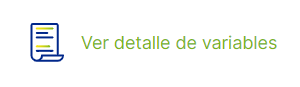

In [5]:
filtro_aportes = 'Colombia'
filtro_reservas = 'AGREGADO'

Los dataframes se filtarán para tener los datos necesarios para la visualización, eligiendo el código de variable y de una vez organizando por fecha.

In [6]:
df_filtrado_aportes = df_aportes.loc[df_aportes['RegionHidrologica'] == filtro_aportes, ['Fecha', 'AportesHidricosEnergia']]
df_filtrado_aportes['AportesHidricosEnergia']=df_filtrado_aportes['AportesHidricosEnergia']/1000000

df_filtrado_reservas = df_reservas.loc[df_reservas['CodigoEmbalse'] == filtro_reservas, ['Fecha', 'VolumenUtilDiarioEnergia']]
df_filtrado_reservas['VolumenUtilDiarioEnergia']=df_filtrado_reservas['VolumenUtilDiarioEnergia']/1000000

display(df_filtrado_reservas)

,Fecha,VolumenUtilDiarioEnergia
823,2024-03-15,2229.5270
796,2024-03-16,2225.2833
778,2024-03-17,2221.0442
742,2024-03-18,2216.8139
715,2024-03-19,2212.5881
...,...,...
1804,2024-06-01,2105.1174
1778,2024-06-02,2105.1129
1748,2024-06-03,2105.1263
1718,2024-06-04,2114.1390


### Manipulación de datos
El siguiente paso es seleccionar solamente la información relevante para el análisis. Los pasos a realizar para preparar la información son:
- La columna fecha se define como fecha.
- Se eligen las columnas a graficar.

### Gráfica en el tiempo
Ahora se realiza la presentación visual de los datos del comportamiento de los aportes y reservas desde abril de 2024 a junio de 2024.

C:\Users\50547\AppData\Local\Temp\ipykernel_16432\796185512.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\50547\AppData\Local\Temp\ipykernel_16432\796185512.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


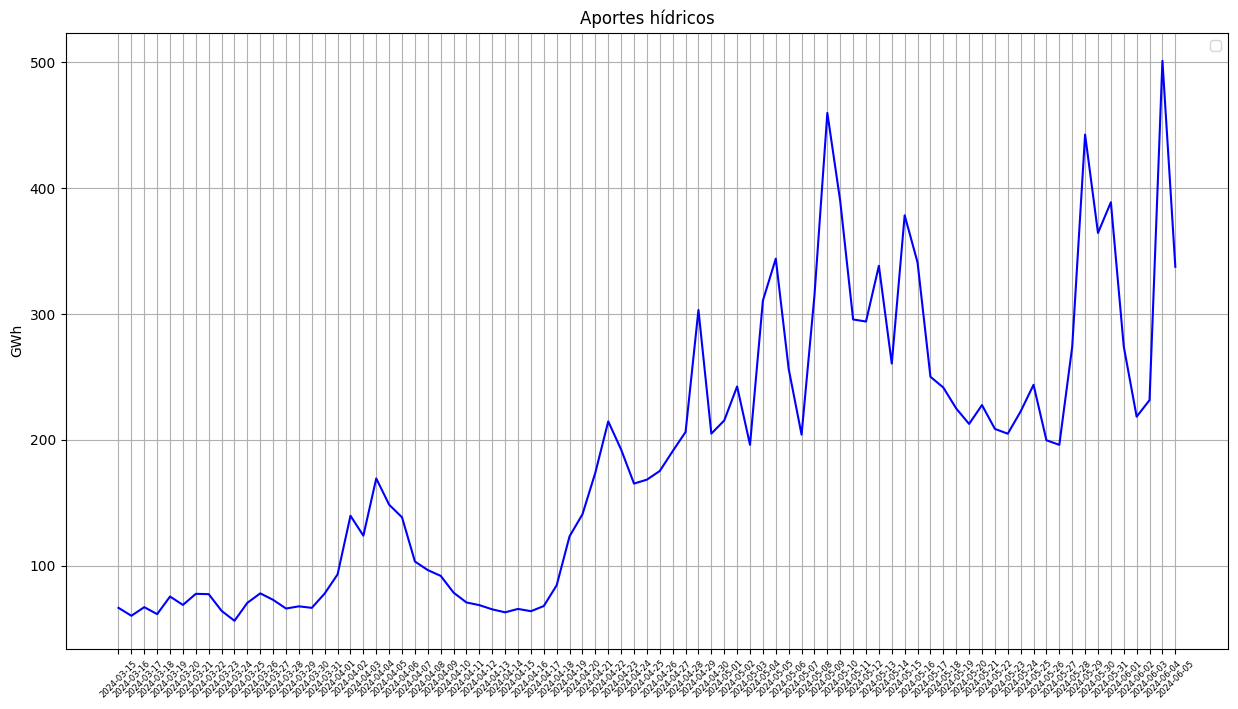

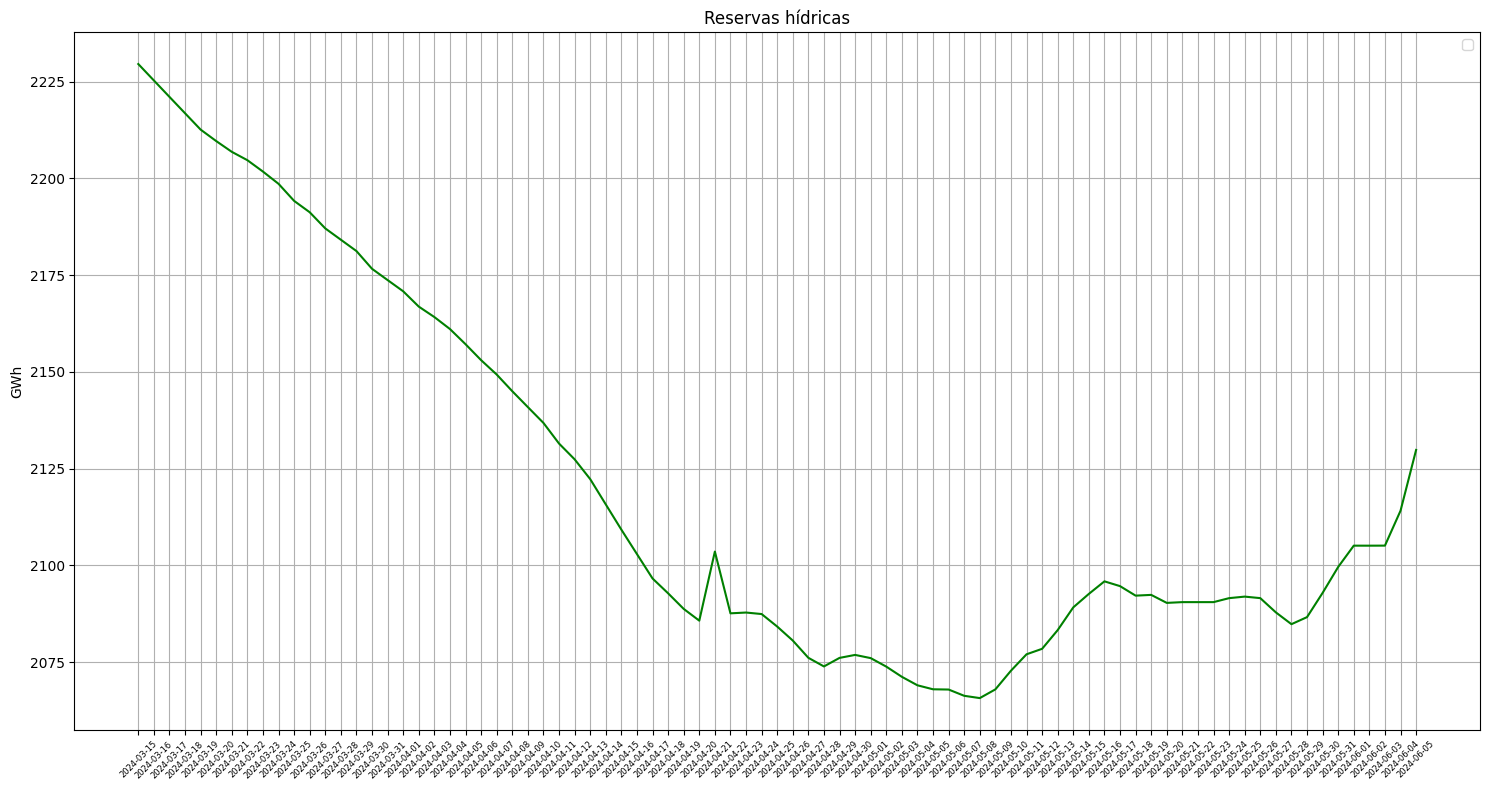

In [7]:
x_axis = 'Fecha'
y_axis_ap = 'Aportes_energia'
y_axis_re = 'Reservas energía'

def graficar() -> None:

    plt.figure(figsize=(15, 8))
    plt.plot(df_filtrado_aportes['Fecha'],df_filtrado_aportes['AportesHidricosEnergia'],  color='blue')
    plt.ylabel('GWh')
    plt.title('Aportes hídricos')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, fontsize=6)

    plt.figure(figsize=(15, 8))
    plt.plot(df_filtrado_reservas['Fecha'],df_filtrado_reservas['VolumenUtilDiarioEnergia'],  color='green')
    plt.ylabel('GWh')
    plt.title('Reservas hídricas')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, fontsize=6)

    plt.tight_layout()
    plt.show()
    return None
graficar()